In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !git clone https://github.com/Mohammad-Daaboul98/Web-Genrater-Dataset.git

In [2]:
import torch.nn.functional as F
import json
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from torch.utils import data
import torchvision.transforms as transforms
import os
import numpy as np
from PIL import Image
import pickle

In [ ]:
# with open('/content/pytorch_pix2code/voc.pkl','rb') as f:
#   data = pickle.load(f)

# print(data)

In [8]:
data = {
 'opening-tag': 0,
 'closing-tag': 1,
 'body': 2,
 'header': 3,
 'navbar-dark': 4,
 'navbar-light': 5,
 'navbar-primary': 6,
 'navbar-warning': 7,
 'navbar-danger': 8,
 'navbar-secondary': 9,
 'navbar-success': 10,
 'navbar-brand': 11,
 'navbar-toggler': 12,
 'navbar-toggler-icon': 13,
 'navbar-collapse': 14,
 'navbar-nav': 15,
 'nav-item': 16,
 'nav-item-active': 17,
 'nav-item-unactive': 18,
 'nav-link': 19,
 'nav-link-undisabled': 20,
 'nav-link-disabled': 21,
 'nav-link-active': 22,
 'form-inline-success': 23,
 'form-inline-danger': 24,
 'form-inline-primary': 25,
 'form-primary': 26,
 'form-danger': 27,
 'form-inline-secondary': 28,
 'form-secondary': 29,
 'form-inline-warning': 30,
 'form-inline-dark': 31,
 'form-dark': 32,
 'form-inline-light': 33,
 'from-d-flex': 34,
 'form-control-me-2': 35,
 'container-fluid': 36,
 'container': 37,
 'container-marketing': 38,
 'main': 39,
 'main-container': 40,
 'carousel-slide': 41,
 'row': 42,
 'col': 43,
 'col-auto': 44,
 'col-auto-my-1': 45,
 'col-7': 46,
 'col-11': 47,
 'col-12': 48,
 'col-lg-4': 49,
 'col-md-7': 50,
 'col-md-5': 51,
 'order-md-2': 52,
 'svg-140px': 53,
 'svg-500px': 54,
 'svg-250px': 55,
 'svg': 56,
 'h-1': 57,
 'h-2': 58,
 'h-3': 59,
 'h-4': 60,
 'h-5': 61,
 'h-6': 62,
 'h-span': 63,
 'h-featurette': 64,
 'paragraph': 65,
 'paragraph-white': 66,
 'paragraph-lead': 67,
 'p-btn': 68,
 'btn-primary': 69,
 'btn-primary-my-1': 70,
 'btn-success': 71,
 'btn-secondary': 72,
 'btn-dark': 73,
 'btn-warning': 74,
 'btn-danger': 75,
 'btn-outline-success': 76,
 'btn-outline-danger': 77,
 'btn-outline-dark': 78,
 'featurette-divider': 79,
 'br': 80,
 'h5-my-0': 81,
 'nav-my-2': 82,
 'a-text-dark': 83,
 'd-flex': 84,
 'text-center': 85,
 'card-deck': 86,
 'card': 87,
 'card-mb-4-shadow-sm': 88,
 'card-header': 89,
 'card-body': 90,
 'card-title': 91,
 'list-unstyled': 92,
 'li': 93,
 'btn-outline-primary': 94,
 'album': 95,
 'album-py-5': 96,
 'album-py-5-bg-light': 97,
 'col-md-4': 98,
 'svg-bd-placeholder-img-card-img-top': 99,
 'p-card-text': 100,
 'd-flex-center': 101,
 'btn-group': 102,
 'btn-outline-secondary': 103,
 'small-text-muted': 104,
 'nav-item-dropdown': 105,
 'nav-link-dropdown-toggle': 106,
 'dropdown-menu': 107,
 'dropdown-item': 108,
 'form-inline': 109,
 'form-inline-my-2-my-lg-0': 110,
 'jumbotron': 111,
 'hr': 112,
 'text-muted': 113,
 'section-jumbotron-text-center': 114,
 'justify-content-center': 115,
 'align-items-center': 116,
 '//comment3': 117,
 'collapse-bg-dark': 118,
 'col-sm-8-col-md-7-py-4': 119,
 'col-sm-4-offset-md-1-py-4': 120,
 'h-4-text-white': 121,
 'paragraph-lead-text-muted': 122,
 'list-unstyled-only': 123,
 'a-text-white': 124,
 'navbar-dark-bg-dark-shadow': 125,
 'd-flex-justify-content-between': 126,
 'navbar-toggler-icon-span': 127,
 'a-navbar-brand-d-flex-align-items-center': 128,
 'jumbotron-center': 129,
 'h-jumbotron': 130,
 'card-shadow': 131,
 'paragraph-card-text': 132,
 'card-img-top': 133,
 'card-mb-4-shadow': 134,
 'btn-outline-secondary-sm': 135,
 'btn-primary-my-2': 136,
 'btn-secondary-my-2': 137,
 'navbar-collapse-dark': 138,
 'navbar-collapse-primary': 139,
 'navbar-collapse-success': 140,
 'navbar-collapse-danger': 141,
 'navbar-collapse-warning': 142,
 'navbar-collapse-secondary': 143,
 'navbar-collapse-light': 144,
 'collapse-bg-primary': 145,
 'collapse-bg-secondary': 146,
 'collapse-bg-success': 147,
 'collapse-bg-danger': 148,
 'collapse-bg-info': 149,
 'paragraph-lead-light': 150,
 'navbar-dark-bg-primary-shadow': 151,
 'navbar-dark-bg-secondary-shadow': 152,
 'navbar-dark-bg-success-shadow': 153,
 'navbar-dark-bg-danger-shadow': 154,
 'navbar-dark-bg-info-shadow': 155,
 '//form': 156,
 'form': 157,
 'form-group': 158,
 'form-group-mb-2': 159,
 'form-group-mx-sm-3-mb-2': 160,
 'label': 161,
 'label-sr-only': 162,
 'label-email-sr-only': 163,
 'label-password-sr-only': 164,
 'label-email': 165,
 'label-password': 166,
 'label-phone': 167,
 'label-file': 168,
 'label-address': 169,
 'label-city': 170,
 'label-state': 171,
 'label-zip': 172,
 'label-mr-sm-2': 173,
 'label-mr-sm-2-white': 174,
 'label-custom-control': 175,
 'label-custom-control-white': 176,
 'label-my-1-mr-2': 177,
 'label-my-1-mr-2-white': 178,
 'input-text-form-control': 179,
 'input-text-form-control-mb-2': 180,
 'input-email-form-control': 181,
 'input-password-form-control': 182,
 'input-phone-form-control': 183,
 'input-file-form-control': 184,
 'input-file-form-control-white': 185,
 'input-checkbox-form-check': 186,
 'input-checkbox': 187,
 'input-radio-form-check': 188,
 'input-radio-form-check-checked': 189,
 'input-radio-form-check-disabled': 190,
 'input-checkbox-custom-control': 191,
 'select2-form-control': 192,
 'select3-form-control': 193,
 'select4-form-control': 194,
 'select5-form-control': 195,
 'textarea-form-control': 196,
 'textarea-form-control-6r': 197,
 'form-check': 198,
 'form-check-disabled': 199,
 'form-check-label': 200,
 'form-check-label-white': 201,
 'small-form-text': 202,
 'btn-primary-mb-2': 203,
 'form-row': 204,
 'form-row-align-items-center': 205,
 'form-group-row': 206,
 'form-group-col-md-6': 207,
 'form-group-col-md-4': 208,
 'form-group-col-md-2': 209,
 'btn btn-primary': 210,
 'col-sm-2-col-form-label': 211,
 'col-sm-2-col-form-label-email': 212,
 'col-sm-2-col-form-label-email-white': 213,
 'col-sm-2-col-form-label-password': 214,
 'col-sm-2-col-form-label-password-white': 215,
 'col-sm-10': 216,
 'col-md-6-mb-3': 217,
 'col-md-4-mb-3': 218,
 'col-md-3-mb-3': 219,
 'legend-radio': 220,
 'legend-radio-white': 221,
 'fieldset-form-group': 222,
 'col-sm-2': 223,
 'col-sm-2-white': 224,
 'input-group': 225,
 'input-group-mb-2': 226,
 'input-group-prepend': 227,
 'input-group-text': 228,
 'span-input-group-text': 229,
 'form-check-mb-2': 230,
 'custom-control-custom-checkbox-mr-sm-2': 231,
 'custom-select-mr-sm-2': 232,
 'custom-select-my-1-mr-sm-2': 233,
 'custom-control-custom-checkbox-my-1-mr-sm-2': 234,
 'custom-file': 235,
 'custom-file-input': 236,
 'custom-file-label': 237,
 'd-flex-flex-column': 238,
 'flex-shrink-0': 239,
 'section-py-5': 240,
 'container-px-5': 241,
 'bg-info-rounded-3-py-5-px-4-px-md-5-mb-5': 242,
 'bg-dark-rounded-3-py-5-px-4-px-md-5-mb-5': 243,
 'text-center-mb-5': 244,
 'fw-bolder': 245,
 'row-gx-5-justify-content-center': 246,
 'row-gx-5': 247,
 'col-lg-8-col-xl-6': 248,
 'form-floating-mb-3': 249,
 'form-signin': 250,
 'text-center-mb-4': 251,
 'img-mb-4': 252,
 'h3-mb-3-font-weight-normal': 253,
 'h3-mb-3-font-weight-normal-white': 254,
 'code': 255,
 'a-link': 256,
 'checkbox-mb-3': 257,
 'btn-btn-lg-btn-primary-btn-block': 258,
 '//new-theme': 259,
 'row-justify-content-center': 260,
 'col-lg-8-col-xxl-6': 261,
 'text-center-my-5': 262,
 'h1-fw-bolder-mb-3': 263,
 'h1-fw-bolder': 264,
 'h2-fw-bolder': 265,
 'btn-btn-primary-btn-lg': 266,
 'section-py-5-bg-light': 267,
 'container-px-5-my-5': 268,
 'row-gx-5-align-items-center': 269,
 'col-lg-6': 270,
 'col-lg-6-col-xl-4': 271,
 'position-relative-mb-5': 272,
 'position-relative-mb-5-mb-lg-0': 273,
 'position-relative': 274,
 'img-fluid-rounded-mb-5-mb-lg-0': 275,
 'img-fluid-rounded-3-mb-5': 276,
 'img-fluid-rounded-3-mb-3': 277,
 'col-lg-6-order-first-order-lg-last': 278,
 'aside': 279,
 'text-decoration-none': 280,
 'h3-fw-bolder-text-decoration-none-link-dark-stretched-link': 281,
 'h2-display-4-fw-bolder-mb-4': 282,
 'btn-btn-lg-btn-primary': 283,
 'section-bg-light-py-5': 284,
 'card-mb-5-mb-xl-0': 285,
 'card-body-p-5': 286,
 'small-text-uppercase-fw-bold-text-muted': 287,
 'small-text-uppercase-fw-bold': 288,
 'mb-3': 289,
 'display-4-fw-bold': 290,
 'list-unstyled-mb-4': 291,
 'li-mb-2': 292,
 'li-mb-2-text-muted': 293,
 'li-text-muted': 294,
 'bi-check': 295,
 'bi-x': 296,
 'bi-star-fill': 297,
 'strong': 298,
 'd-grid': 299,
 '//new-added': 300,
 'pricing-plan-card-group-d-flex': 301,
 'card-set-price-p-1-d-none-d-lg-none-d-lg-block': 302,
 'card-header-text-center-pb-4-item': 303,
 'h5-pt-3-text-black-card-title': 304,
 'span-h1-text-black': 305,
 'p-small-text-black': 306,
 'h5-pt-3-text-white-card-title': 307,
 'span-h1-text-white': 308,
 'p-small-text-white': 309,
 'card-body-d-flex-flex-column': 310,
 'list-unstyled-text-right': 311,
 'w-100-d-md-none-mt-4': 312,
 'card-p-1-starter': 313,
 'list-unstyled-text-center': 314,
 'span-d-lg-none': 315,
 'fa-check': 316,
 'fa-times': 317,
 'btn-lg-btn-block-btn-dark-mt-auto': 318,
 'btn-lg-btn-block-btn-success-mt-auto': 319,
 'card-advanced-p-1': 320,
 'card-business-p-1': 321,
 'col-md-4-col-sm-6': 322,
 'pricingTable': 323,
 'svg-0-0-360-220': 324,
 'g': 325,
 'path-ae003d': 326,
 'path-005c99': 327,
 'path-db2c29': 328,
 'text-78': 329,
 'text-29': 330,
 'text-15': 331,
 'pricing-content': 332,
 'h3-title': 333,
 'ul-pricing-content': 334,
 'b': 335,
 'pricingTable-signup': 336,
 'pricingTable-blue': 337,
 'pricingTable-red': 338,
 'col-lg-5-col-md-8-col-sm-8-d-block-m-auto': 339,
 'text-primary': 340,
 'fa-check-circle': 341,
 'pt-2-pb-1': 342,
 'h1-pb-3-text-primary-font-weight-bold': 343,
 'h1-pb-3-color-primary-text-text-primary-font-weight-bold': 344,
 'pb-2': 345,
 'row-pb-5': 346,
 'col-md-9-col-lg-7': 347,
 'btn-lg-btn-block-btn-primary': 348,
 'col-lg-1-d-none-d-lg-block': 349,
 'vl': 350,
 'color-primary-text-text-primary': 351,
 'w-50-px-3-py-3-pt-md-4-pb-md-5-mx-auto-text-center': 352,
 'h1-display-4-font-weight-bold': 353,
 'div': 354,
 'paragraph-lead-text-muted-mb-0': 355,
 'nav-breadcrumb': 356,
 'ol-breadcrumb': 357,
 'li-breadcrumb-item': 358,
 'li-breadcrumb-item-active': 359,
 'card-header-bg-primary-text-white': 360,
 'fa-envelope': 361,
 'fa-home': 362,
 'mx-auto': 363,
 'btn-primary-text-right': 364,
 'col-12-col-sm-4': 365,
 'card-bg-light-mb-3': 366,
 'card-header-bg-success-text-white-text-uppercase': 367,
 'navbar-navbar-expand-md-navbar-dark-bg-dark': 368,
 'collapse-navbar-collapse-justify-content-end': 369,
 'navbar-nav-m-auto': 370,
 'input-group-input-group-sm': 371,
 'input-group-append': 372,
 'btn-secondary-btn-number': 373,
 'btn-success-btn-sm-ml-3': 374,
 'container-padding-top-0': 375,
 'h2-text-center': 376,
 'col-12-col-md-8-col-lg-6-pb-5': 377,
 'card-border-primary-rounded-0': 378,
 'card-header-p-0': 379,
 'bg-info-text-white-text-center-py-2': 380,
 'p-m-0': 381,
 'card-body-p-3': 382,
 'fa-user-text-info': 383,
 'fa-envelope-text-info': 384,
 'fa-comment-text-info': 385,
 'input-btn-info-btn-block-rounded-0-py-2': 386,
 'h3': 387,
 'h1-white': 388,
 'label-white': 389,
 'margin-5p': 390,
 'margin-top-3p': 391,
 'any': 392,
 '\n': 393,
 '<START>': 394,
 '<END>': 395,
 '}': 396,
 '{': 397,
 ',': 398,
 ' ': 399,
 '':400
}

pickle.dump(data, open('voc-v4.pkl' , 'wb'))

In [4]:
class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, stride=2)
        self.conv2 = nn.Conv2d(64, 64, 3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=2)
        self.conv4 = nn.Conv2d(128, 128, 3, stride=2)
        self.conv5 = nn.Conv2d(128, 256, 3, stride=2)
        self.conv6 = nn.Conv2d(256, 256, 3, stride=2)
        self.fc1 = nn.Linear(in_features=256*7*7, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=1024)

    def forward(self, x):
        # x -> [-1, 3, 512, 512]
        
        x = F.relu(self.conv1(x))
        # x -> [-1, 64, 255, 255]
        x = F.relu(self.conv2(x))
        # x -> [-1, 64, 126, 126]
        x = F.relu(self.conv3(x))
        # x -> [-1, 128, 62, 62]
        x = F.relu(self.conv4(x))
        # x -> [-1, 128, 30, 30]
        x = F.relu(self.conv5(x))
        # x -> [-1, 256, 14, 14]
        x = F.relu(self.conv6(x))
        # x -> [-1, 256, 6, 6]
        x = x.view(-1, 256*7*7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
  

class ContextEncoder(nn.Module):

    def __init__(self):
        super(ContextEncoder, self).__init__()
        self.rnn = nn.RNN(input_size=401, hidden_size=128, num_layers=2, batch_first=True)
    
    def forward(self, x, h=None):
        # x -> [-1, seq_size, 19], h -> [num_layer=2,-1, 128]

        if not h:
            h = torch.zeros((2, x.size(0), 128)).cuda()

        x, _ = self.rnn(x, h)
        return x

class Decoder(nn.Module):

    def __init__(self):
        super(Decoder, self).__init__()
        self.rnn = nn.RNN(input_size=1024+128, hidden_size=512, num_layers=2, batch_first=True)
        self.l1 = nn.Linear(512, 401)
    
    def forward(self, image_feature, context_feature, on_cuda = False, h = None):
        # image_feature -> [-1, 1024], context_feature -> [-1, seq_size=48, 128], h -> [num_layer=2, -1, 512]
        image_feature = image_feature.unsqueeze(1)
        # image_feature -> [-1, 1, 1024]
        image_feature = image_feature.repeat(1, context_feature.size(1), 1)
        # image_feature -> [-1, seq_size, 1024]
        x = torch.cat((image_feature, context_feature), 2)
        # x -> [-1, seq_size=48, 1024+128]

        if not h:
            h = torch.zeros((2, x.size(0), 512)).cuda()

        x, _ = self.rnn(x, h)
        x = self.l1(x)
        # x = F.softmax(x, dim=1)
        return x

class Pix2Code(nn.Module):

    def __init__(self):
        super(Pix2Code, self).__init__()
        self.image_encoder = ImageEncoder()
        self.context_encoder = ContextEncoder()
        self.decoder = Decoder()

    def forward(self, image, context):
        image_feature = self.image_encoder(image)
        context_feature = self.context_encoder(context)
        output = self.decoder(image_feature, context_feature)
        return output


In [5]:
from torch.utils import data

START_TOKEN = '<START>'
END_TOKEN = '<END>'
PLACEHOLDER = ' '
# CONTEXT_LENGTH = 48
image_size = 512


class Vocabulary:
    
    def __init__(self, file_path):
        self.load_vocab(file_path)
        self.length = len(self.vocab_to_index)
    
    def load_vocab(self, file_path):
        self.vocab_to_index = {}
        with open(file_path, 'rb') as vocab_file:
            self.vocab_to_index = pickle.load(vocab_file)
        self.index_to_vocab = {value:key for key, value in self.vocab_to_index.items()}
    
    def to_vec(self, word):
        vec = np.zeros(self.length)
        vec[self.vocab_to_index[word]] = 1
        return vec
       
    def to_vocab(self, index):
        return self.index_to_vocab[index]

class UIDataset(data.Dataset):
    
    def __init__(self, file_path, vocab_file_path):
        self.file_path = file_path
        self.paths = []
        self.get_paths()
        self.transform = transforms.Compose([
            transforms.Resize([image_size, image_size]),
            transforms.ToTensor(),
        ])
        self.vocab = Vocabulary(vocab_file_path)
        
    def get_paths(self):
        for f in os.listdir(self.file_path):
            if f.find('.gui') != -1:
                file_name = f[:f.find('.gui')]
                if os.path.isfile('{}/{}.png'.format(self.file_path, file_name)):
                    self.paths.append(file_name)
    
    def __len__(self):
        return(len(self.paths))
    
    def __getitem__(self, index):
        image = self.transform(Image.open('{}/{}.png'.format(self.file_path, self.paths[index])))[:-1]
        context, prediction = self.read_gui('{}/{}.gui'.format(self.file_path, self.paths[index]))
        return image, context, prediction
    
    def read_gui(self, file_path):
        context = []
        prediction = []
        
        # Tokenize the target code and ads start and end token
        token_sequence = [PLACEHOLDER]
        token_sequence.append(START_TOKEN)
        with open(file_path, 'r') as f:
            for line in f:
                line = line.replace(',', ' ,').replace('\n', ' \n')
                tokens = line.split(' ')
                for token in tokens:
                    token_sequence.append(token)
        token_sequence.append(END_TOKEN)
        
        # Generates cotext prediction pair
        context = token_sequence[:-1]
        prediction = token_sequence[1:]
        
        # suffix = [PLACEHOLDER] * CONTEXT_LENGTH
        # a = np.concatenate([suffix, token_sequence])
        # for j in range(len(token_sequence)):
        #     # context.append(a[j:j + CONTEXT_LENGTH])
        #     context.append(a[j])
        #     prediction.append(a[j + CONTEXT_LENGTH])
        
        # One hot encoding
        prediction_vec = []
        for word in prediction:
            prediction_vec.append(self.vocab.to_vec(word))
        context_vec = []
        for word in context:
            context_vec.append(self.vocab.to_vec(word))
        
        return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)

In [ ]:
# %cd /content
# !ls | wc -l

/content
3


In [ ]:
# !cp -r /content/drive/MyDrive/Dataset/V10/Landing /content

cp: cannot access '/content/drive/MyDrive/Dataset/V10/Landing': Input/output error


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

dataset = UIDataset('/content/drive/MyDrive/Dataset/V12/SUPER_Landing', '/content/voc-v4.pkl')


# Training
net = Pix2Code().cuda()
# net.load_state_dict(torch.load('/content/drive/MyDrive/senior/model/UL_Data_e5.weights'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)
loss_history = []
acc_history = []
val_loss_history = []
val_acc_history = []



for epoch in range(10):
    net.zero_grad()
    for j, data in enumerate(dataset):
        image, context, prediction = data
        image = image.unsqueeze(0).cuda()
        context = context.unsqueeze(0).cuda()
        prediction = prediction.cuda()
        output = net(image, context)
        output = output.squeeze(0)
        prediction = torch.argmax(prediction, 1)
        loss = criterion(output, prediction)
        loss.backward()
        loss_history.append(loss.data)

        # calculate accuracy
        _, predicted = torch.max(output, 1)
        acc = accuracy_score(prediction.cpu().numpy(), predicted.cpu().numpy())
        acc_history.append(acc)

        if j%10 == 0:
            optimizer.step()
            print('Epoch: {}, Loss: {},  Accuracy: {}'.format(epoch ,loss.data, acc))
            net.zero_grad()

    # Add learning rate scheduler here
    # ...
    # validate the model on the validation dataset
    # with torch.no_grad():
    #     val_loss = 0
    #     val_acc = 0
    #     for val_data in dataset:
    #         val_image, val_context, val_prediction = val_data
    #         val_image = val_image.unsqueeze(0).cuda()
    #         val_context = val_context.unsqueeze(0).cuda()
    #         val_prediction = val_prediction.cuda()
    #         val_output = net(val_image, val_context)
    #         val_output = val_output.squeeze(0)
    #         val_prediction = torch.argmax(val_prediction, 1)
    #         val_loss += criterion(val_output, val_prediction).data
            
    #         # calculate accuracy
    #         _, val_predicted = torch.max(val_output, 1)
    #         val_acc += accuracy_score(val_prediction.cpu().numpy(), val_predicted.cpu().numpy())

    #     val_loss /= len(dataset)
    #     val_acc /= len(dataset)
    #     val_loss_history.append(val_loss)
    #     val_acc_history.append(val_acc)
        
    #     print('Validation Loss: {}, Validation Accuracy: {}'.format(val_loss, val_acc))



torch.save(net.state_dict(), './SUPER_Landing_e10.weights')

Epoch: 0, Loss: 6.004062175750732,  Accuracy: 0.0
Epoch: 0, Loss: 5.943908214569092,  Accuracy: 0.0
Epoch: 0, Loss: 5.892973899841309,  Accuracy: 0.42152466367713004
Epoch: 0, Loss: 5.821765422821045,  Accuracy: 0.42517006802721086
Epoch: 0, Loss: 5.732771396636963,  Accuracy: 0.4188034188034188
Epoch: 0, Loss: 5.6294264793396,  Accuracy: 0.3972602739726027
Epoch: 0, Loss: 5.427567481994629,  Accuracy: 0.4049586776859504
Epoch: 0, Loss: 5.146045207977295,  Accuracy: 0.41694915254237286
Epoch: 0, Loss: 4.825665473937988,  Accuracy: 0.41232227488151657
Epoch: 0, Loss: 4.421573162078857,  Accuracy: 0.4220532319391635
Epoch: 0, Loss: 4.025440692901611,  Accuracy: 0.4189723320158103
Epoch: 0, Loss: 3.6928632259368896,  Accuracy: 0.42028985507246375
Epoch: 0, Loss: 3.5802791118621826,  Accuracy: 0.4177215189873418
Epoch: 0, Loss: 3.3919363021850586,  Accuracy: 0.41935483870967744
Epoch: 0, Loss: 3.325071096420288,  Accuracy: 0.42045454545454547
Epoch: 0, Loss: 3.275446891784668,  Accuracy: 0

In [ ]:
!cp -r /content/SUPER_Landing_e10.weights /content/drive/MyDrive/senior/model

In [ ]:
LH = []
VAL_LH = []

for i in range(len(loss_history)):
  LH.append(loss_history[i].item())

for j in range(len(val_loss_history)):
  VAL_LH.append(val_loss_history[j].item())

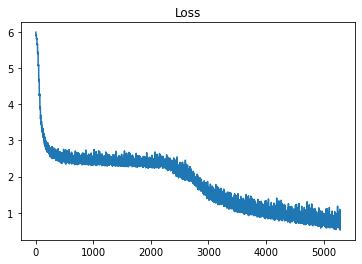

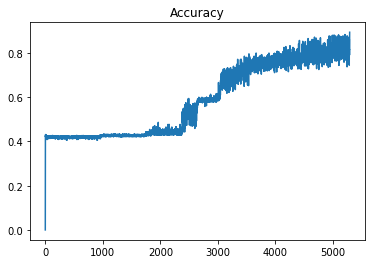

In [ ]:
# Plot loss and accuracy
plt.plot(LH)
plt.title('Loss')
plt.show()
plt.plot(acc_history)
plt.title('Accuracy')
plt.show()

In [ ]:
# # Plot loss and accuracy
# plt.plot(VAL_LH)
# plt.title('Validation Loss')
# plt.show()
# plt.plot(val_acc_history)
# plt.title('Validation Accuracy')
# plt.show()

In [ ]:
net = Pix2Code()
net.load_state_dict(torch.load('/content/Landing_V2_e10.weights'))
net.cuda().eval()

Pix2Code(
  (image_encoder): ImageEncoder(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (fc1): Linear(in_features=100352, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (context_encoder): ContextEncoder(
    (rnn): RNN(401, 128, num_layers=2, batch_first=True)
  )
  (decoder): Decoder(
    (rnn): RNN(1152, 512, num_layers=2, batch_first=True)
    (l1): Linear(in_features=512, out_features=401, bias=True)
  )
)

In [ ]:
test_data = UIDataset('/content/drive/MyDrive/Dataset/V9/landing_V1/landing_evaluation', '/content/voc-v4.pkl')
vocab = Vocabulary('/content/voc-v4.pkl')

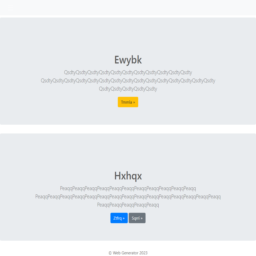

In [ ]:
image, *_ = test_data.__getitem__(np.random.randint(len(test_data)))
t = transforms.ToPILImage()
image = image.unsqueeze(0)
t(image.squeeze())

In [ ]:
image = image.cuda()
ct = []
ct.append(vocab.to_vec(' '))
ct.append(vocab.to_vec('<START>'))
output = ''
for i in range(200):
    context = torch.tensor(ct).unsqueeze(0).float().cuda()
    index = torch.argmax(net(image, context), 2).squeeze()[-1:].squeeze()
    v = vocab.to_vocab(int(index))
    if v == '<END>':
        break
    output += v
    ct.append(vocab.to_vec(v))

with open('/content/output.gui', 'w') as f:
    f.write(output)

print(output)

header{
container{
h-2{
text-center{
row{
col-md-4{
h-2
paragraph
btn-danger
}
}
}
}
}
}
}
}
}
}
main{
container{
text-center{
h-2
paragraph
}
}
main{
h-2
paragraph
}
}
main{
h-2
paragraph-lead
}
}
}{
{
btn-outline-secondary-sm
}
}
}
}
}
}
}
}
}
}
}
main{
container{
text-center{
h-2
paragraph
}
}
main{
h-2
paragraph
}
}
main{
h-2
paragraph-lead
}
}
}{
{
btn-outline-secondary-sm
}
}
}
}
}
}
}
}
}
}
}
main{
container{
text-center{
h-2
paragraph
}
}
main{



<h1>convert json to dict</h1>

In [ ]:
with open('/content/data.json') as json_file:
  data = json.load(json_file)

print("Type:", type(data))
# print("\nPeople1:", data['people1'])
# print("\nPeople2:", data['people2'])

Type: <class 'dict'>


In [ ]:
for k, i in zip(data,range(len(data))):
  data[k] = i
print(data)

{'header': 0, 'navbar-dark': 1, 'navbar-light': 2, 'navbar-primary': 3, 'navbar-warning': 4, 'navbar-secondary': 5, 'navbar-success': 6, 'navbar-brand': 7, 'navbar-toggler': 8, 'navbar-toggler-icon': 9, 'navbar-collapse': 10, 'navbar-nav': 11, 'nav-item': 12, 'nav-item-active': 13, 'nav-item-unactive': 14, 'nav-link-undisabled': 15, 'nav-link-disabled': 16, 'nav-link-active': 17, 'form-inline-success': 18, 'form-inline-light': 19, 'from-d-flex': 20, 'form-control-me-2': 21, 'container-fluid': 22, 'main': 23, 'main-container': 24, 'carousel-slide': 25, 'container': 26, 'container-marketing': 27, 'row': 28, 'col-lg-4': 29, 'col-md-7': 30, 'col-md-5': 31, 'order-md-2': 32, 'svg-140px': 33, 'svg-500px': 34, 'h-1': 35, 'h-2': 36, 'h-3': 37, 'h-4': 38, 'h-5': 39, 'h-6': 40, 'h-span': 41, 'h-featurette': 42, 'paragraph': 43, 'paragraph-lead': 44, 'p-btn': 45, 'btn-primary': 46, 'btn-secondary': 47, 'btn-outline-success': 48, 'btn-dark': 49, 'btn-warning': 50, 'btn-danger': 51, 'btn-success': 

In [ ]:
directory = os.fsencode('/content/gui')
    
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  with open('/content/gui/'+filename, 'r') as inp:
    # fixed = inp.read().replace('{', ' {')
    fixed1 = inp.read().replace(',', ', ')
  with open('/content/gui/'+filename, 'w') as out:
    # out.write(fixed)
    out.write(fixed1)